### Boiler Plate Code

In [1]:
import random
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange
%matplotlib inline

In [2]:
# for managing file opening and closing
def read_integers(filename):
    with open(filename) as f:
        return [int(elem) for elem in f.read().split()]

file_path = '../QAPInstances/tai30b.dat'
file_it = iter(read_integers('../QAPInstances/tai30b.dat'))

# Number of points
n = next(file_it)

# Distance between locations
w = np.array([[next(file_it) for j in range(n)] for i in range(n)])
d = np.array([[next(file_it) for j in range(n)] for i in range(n)])

In [3]:
# vectorised cost function
def cost(X, D, W) -> float:
    return np.sum(W * D[X][:, X])

In [4]:
# set up params for plots
SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=MED)    # fontsize of the axes title
plt.rc('axes', labelsize=MED)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=LARGE)       # controls default text sizes

##### Iterated Local Search

In [5]:
# we follow the pertubation method described in the paper: ILS for QAP (Sultze '05)
# the paper perturbs solution via swapping k indices 

def peturbation(perm: np.array, k: int):
    
    new_perm = perm[:]

    # of course, this inexact method can result in pertubations of size < k, but these occur with sufficiently small probability 
    for _ in range(k): 
        i = random.randint(0, len(perm)-1)
        j = random.randint(0, len(perm)-1)
        new_perm[i], new_perm[j] = new_perm[j], new_perm[i]   
    
    return new_perm


In [6]:
# generates initial solution via a random permuatation

def generate_initial_solution(n: int):
    return np.random.permutation(n)

In [7]:
# performs local search by exploring the 2-OPT neighborhood

def local_search(permutation: np.array):
    n = len(permutation)
    curr_best = np.copy(permutation)  # create a deep copy
    
    for i in range(1, n-2):
        for j in range(i+1, n):
            
            new_perm = np.copy(curr_best)
            new_perm[i:j] = curr_best[j-1:i-1:-1]
            
            if cost(new_perm, d, w) < cost(curr_best, d, w): 
                curr_best = new_perm        
    
    return curr_best

In [8]:
# implements the acceptance criterion
def acceptance_criterion(perm1: np.array, perm2: np.array):
     return perm1 if cost(perm1, d, w) < cost(perm2, d, w) else perm2


In [19]:
# follows notation from paper 

def iterated_local_search(n_iters: int):
    s0 = generate_initial_solution(30)
    s  = local_search(s0)
    

    curr_best = s
    cost_history = [cost(s,d,w)]
    perm_history = [s]
    n = len(s0)

    for _ in trange(n_iters):
        s1 = peturbation(s, k=n//4)
        s2 = local_search(s1)
        curr_best = acceptance_criterion(curr_best, s2)
        
        cost_history.append(cost(curr_best, d, w))
        perm_history.append(curr_best)

    return s, cost_history, perm_history

### Verification

a small test case to verify the hueristic is correclty implemeneted. 

In [27]:
soln, cost_hist, perm_hist = iterated_local_search(10_000)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [02:30<00:00, 66.63it/s]


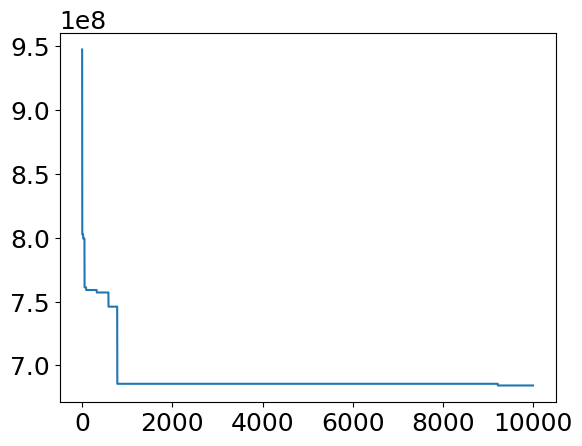

In [28]:
plt.plot(cost_hist)

### Automated Testing

In [12]:
# code for automating the opening, closing and testing of a hueristic on every instance in QAPLib
def test_hueristic():

    for filename in os.listdir(instance_path):
    
        file_it = iter(read_integers(instance_path+filename))

        # open QAP instance param's 
        n = next(file_it)
        w = np.array([[next(file_it) for j in range(n)] for i in range(n)])
        d = np.array([[next(file_it) for j in range(n)] for i in range(n)])

        # TODO: run the hueristic on the problem instance by calling whatever hueristic we have defined here, and then write to file

    return